In [1]:
%matplotlib inline
#jupyter에서 보려면 위의 명령실행

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
train = pd.read_csv('data/train.csv', index_col='PassengerId')

In [4]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.countplot
### x축만 설정함

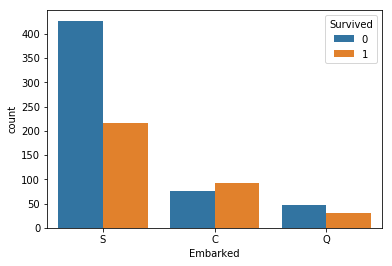

In [7]:
sns.countplot(data=train, x="Embarked", hue="Survived")

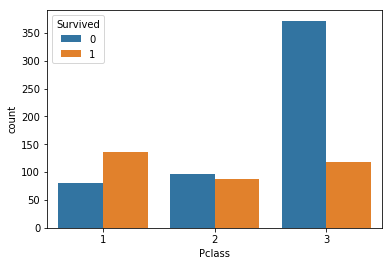

In [9]:
sns.countplot(data=train, x="Pclass", hue="Survived")

### 2.barplot
### X축 y축 둘다 지정가능

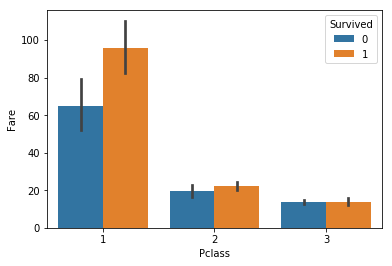

In [14]:
sns.barplot(data=train, x="Pclass", y="Fare",hue="Survived")

### pointplot 
### x축의 값이 서로 연관성이 있으면 pointplot
### x축의 값이 서로 연관성이 없으면 barplot

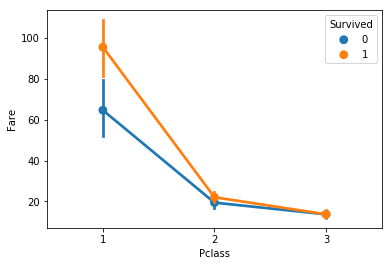

In [16]:
sns.pointplot(data=train, x="Pclass", y="Fare",hue="Survived")

### 4.distplot
#### 데이터의 분호를 확인할수 있다. 

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


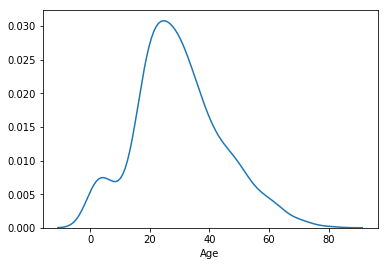

In [17]:
sns.distplot(train['Age'], hist=False)
# 에러가 나는데...이건 데이터에 null이 있어서 그럼

In [18]:
#null데이터를 평균으로 넣는다,,,,전체적을 데이어에 영향을 안주게

mean_age = train['Age'].mean()
train.loc[train['Age'].isnull(), 'Age'] = mean_age

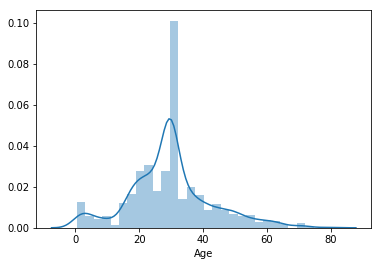

In [21]:
sns.distplot(train['Age'], hist=True)

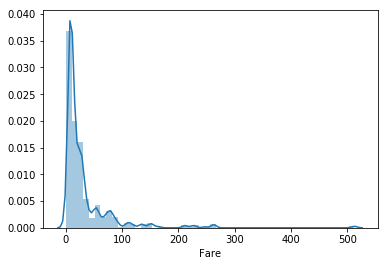

In [23]:
sns.distplot(train['Fare'], hist=True)

In [24]:
#이상치(outlier)를 제거한 새로은 데이터 프레임을 만들어서 그래프를 본다.
low_fare = train[train['Fare'] < 100]

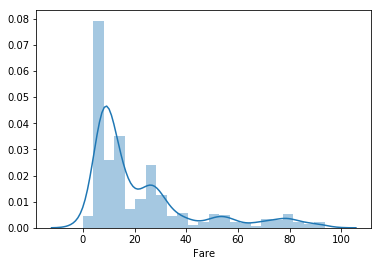

In [25]:
sns.distplot(low_fare['Fare'], hist=True)

In [26]:
#낮은 운임요금을(Fare)을 지불한 승갣들의 죽을확율이 높다
perish = low_fare[low_fare['Survived']==0]
survived = low_fare[low_fare['Survived']==1]

In [30]:
perish.head(5)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S


In [31]:
survived.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


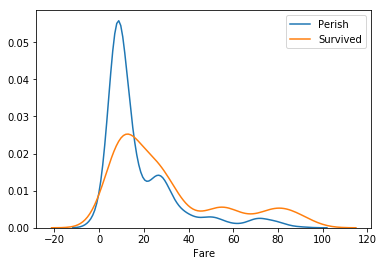

In [33]:
sns.distplot(perish['Fare'], hist=False, label="Perish")
sns.distplot(survived['Fare'], hist=False, label="Survived")

### lmplot(scatter plot, 산점도)

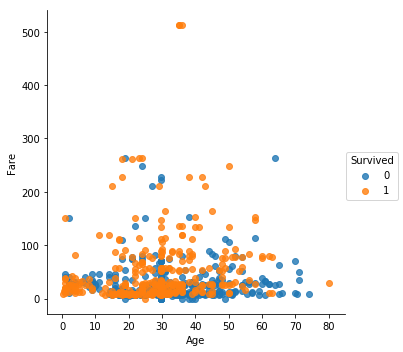

In [35]:
#회귀선이 사라지게 하는 옵션사용
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

### subplots 
### (한개의 figure에 여러개의 plot을 그리기)

In [36]:
import matplotlib.pyplot as plt

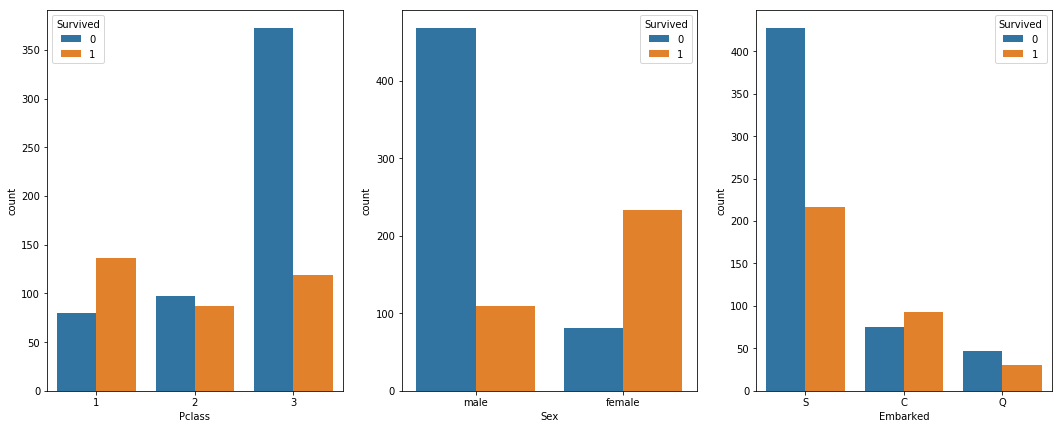

In [44]:
figure,(ax1, ax2, ax3)=plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18, 7)
sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax3)